# 0.0. Imports

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns

# 1.0. Loading Data

In [2]:
path = '2-visualization-data/base_vigente_anos_anteriores.csv'
data_raw = pd.read_csv(path)
data_raw.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


# 2.0. Exploration Data

In [3]:
# Avaliando colunas e linhas
data_raw.shape

(60000, 171)

In [4]:
# Avaliando o desbalanceamento da feature target
data_raw['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

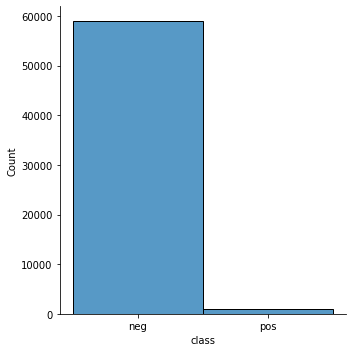

In [5]:
sns.displot(data_raw['class'])

In [6]:
df1 = data_raw.copy()

In [7]:
# mudando POS para 1 e NEG para 0
def mudando_class(df):
    if df['class'] == 'neg':
        return 0
    else:
        return 1
    
df1['class'] = df1.apply(mudando_class,axis=1)

In [8]:
# Alterando onde há 'na' para NaN, pois o 'na' está como string, mas é vazio de dado (feito pela equipe tecnica)
df1 = df1[df1.columns.values].replace('na',np.nan)

In [46]:
# Apesar de serem apenas features numéricas, da 3 em diante, estão todas como Object, logo, serão transformadas para float
# Float, pq existem algumas colunas com numeros quebrados. Entao para nao perder tempo avaliando numero por numero, com float 
# nao há perdas (um pouco de memoria sim). O ideal seria fazer uma varredura, ou perguntar aos tecnicos quais colunas podem
# ser trabalhadas como Inteiras
df2 = df1.copy()
coluObj = df1.select_dtypes('O').columns
for n in coluObj:
    df2[n] = df2[n].astype('float')

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(2)
memory usage: 78.3 MB


In [65]:
df2.shape[0]

60000

In [68]:
# avaliacao dos dados Nan
count = 0
for col in df2.columns.values:
    if (df2[col].isnull().sum()/df2.shape[0]*100>30):
        print(col)
        print('Qtd(%):',round(df2[col].isnull().sum()/df2.shape[0]*100,2))
        print('Media:',round(df2[col].mean(),2))
        print('Mediana:',round(df2[col].median(),2))
        print('\n')
        count=count+1
        
print('Quantidade de colunas com NaN -',count)

ab_000
Qtd(%): 77.22
Media: 0.71
Mediana: 0.0


bk_000
Qtd(%): 38.39
Media: 280429.11
Mediana: 210660.0


bl_000
Qtd(%): 45.46
Media: 321353.69
Mediana: 222540.0


bm_000
Qtd(%): 65.92
Media: 399603.17
Mediana: 239140.0


bn_000
Qtd(%): 73.35
Media: 463710.83
Mediana: 251400.0


bo_000
Qtd(%): 77.22
Media: 513147.82
Mediana: 270660.0


bp_000
Qtd(%): 79.57
Media: 551389.8
Mediana: 288320.0


bq_000
Qtd(%): 81.2
Media: 582871.32
Mediana: 305100.0


br_000
Qtd(%): 82.11
Media: 604886.61
Mediana: 320400.0


cr_000
Qtd(%): 77.22
Media: 37.06
Mediana: 0.0


Quantidade de colunas com NaN - 10


In [80]:
c = df2[df2.columns.values].isnull().sum()/df2.shape[0]*100 > 30

In [82]:
c

class     False
aa_000    False
ab_000     True
ac_000    False
ad_000    False
          ...  
ee_007    False
ee_008    False
ee_009    False
ef_000    False
eg_000    False
Length: 171, dtype: bool

# Observações

1 - "Não importa" o que são as features, pois elas estão decodificadas. Destacando as relevancias de seus valores para a feature target;

2 - Levantar as features importantes para a target. Isso pode ser feito aplicando Random Forest e extraindo as Importancias;

3 - Considerando o desbalanceamento dos dados, é importante fazer aplicação de Oversampling ou Undersampling, de forma a aumentar ou diminuir volume de dados de uma das classes, para haver o balanceamento dos dados;

Logo, o ponto 3 será o primeiro a ser trabalhado.